# Finding the Best Markets to Advertise In

## **Introduction**
In this project we will assume that we are working for an e-learning company that offers courses on programming, mos of the courses are on web and mobile development but we also cover data science, game development and others. we want to promote our product and we woud like to invest some money in advertisement.
## **Goal**
The project goal is to find out the two best markets to advertise our product in.

To reach our goal we could organize surveys for some markets to find which is the best choices for advertising. However, this would be more expensive and for now we have to explore some other options.
We can use existing data that could be usufel for our purposes. A good candidate is the data from [FreeCodecamp](https://www.freecodecamp.org/) which is a free e-learningn platform that offers courses on web development, exactly this [dataset](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/).Because they have a good average of publication to over 400,000 followers, we can consider this survey as interesting since this is directed to new coders with several interests which is good for our analysis.



## **First Glance**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
newcoders_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
newcoders_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,...,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The survey has 136 columns, ket's quickly explain some of them:
* there are questions about bootcamps 
* demographic questions, number of children
* employment fields ( status, expected earning etc)
* sites they have learned coding
* preferences to work 
and there are other more fields that we probably use

before to analyze the sample data we have, it is important to clarify whether this sample is representative for our population of interest and ir has the right categories to accomplish our goal

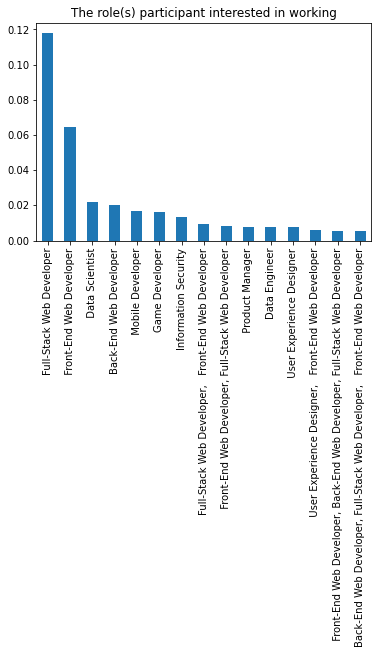

In [4]:
newcoders_survey["JobRoleInterest"].value_counts(normalize=True).head(15).plot.bar(title="The role(s) participant interested in working")

In [5]:
print("combination of responses")
len(newcoders_survey["JobRoleInterest"].value_counts())

combination of responses


3213

After plot the column which tell us the role that participant is interested in working we can say that almost 12% of particpants are interested in working in Full stack web developer, followed by front end web developer with almost 7% and in third place is data science with onlt 2%. take into account that we just plot the first 15 combinations of roles since there are 3213 combinations. the first 7 roles are single roles but in the top 15 we can find that there are people interestd in more than one subject.
Because the focus of our courses is on web and mobile development the survey shows that these two roles are in the top 5 of roles that people are interested in. 

## **Analysing**

For our goal we want to invest in two markets, for this we will work with the country which the participans are, especificly the variable countrylive is our indicator to find the markets. Since the data set provides information at a country level, we can relate each country as an individual market, it means our goal is directed to find the two best countries to advertise in. But which tell us if the market is potential ? the number of potential customers for each market.

first of all we need to point to people how response the role they are interested because there are some participans did not answer so we will leave only people which have roles defined.
 

In [6]:
# number of rows before cleaning
newcoders_survey.shape

(18175, 136)

In [7]:
newcoders_survey.dropna(axis=0,subset=["JobRoleInterest"],inplace=True)

In [8]:
# new number of rows 
newcoders_survey.shape

(6992, 136)

In [9]:
## frencuency tables
absolute_frecuencies=newcoders_survey["CountryLive"].value_counts()
relative_frecuencies=newcoders_survey["CountryLive"].value_counts(normalize=True)*100

pd.DataFrame(data={"Absolute frecuency":absolute_frecuencies,
                   "Relative frecuency":relative_frecuencies})

,Absolute frecuency,Relative frecuency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Bolivia,1,0.014624
Mozambique,1,0.014624
Vanuatu,1,0.014624
Kyrgyzstan,1,0.014624


United states is the main contry, the 47% of participants are living in this contry followed by India a United kingdom. so new coders are concentrated in US.
We need to go deeper with our analysis and figure out how much money new coders are willing to spend on learning since if we invest in markets where people are only willing to learn for free is too risk and non profitable for us. Our company sells sucriptions at price of $59 per month so let's to analyse the MoneyForLearning variable in the dataset but only for the next countries: US,India, United Kingdom and Canada, this decision is for the next tow reasons.
* These countries have the highest absolute frecuencies in our sample, so wee need a decent amount of data for each one.
* the courses our company offer is written in english and this language is official in all these countries which that increases our chances to target the right people with our ads

For this purpose we will create a new column to find the money a student has spent per month, for this we will divide the MoneyForLearning column to MonthsProgramming column. There are some students that answered that they has been learning to code for 0 months since they had just started when they completed the survey, to avoid dividing by 0 we will replace values of 0 with 1

In [10]:
newcoders_survey["MonthsProgramming"].replace({0:1},inplace=True)

In [11]:
newcoders_survey["MoneySpentMonth"]=newcoders_survey["MoneyForLearning"]/newcoders_survey["MonthsProgramming"]

In [12]:
newcoders_survey[newcoders_survey["MoneySpentMonth"].isnull()].shape

(675, 137)

We can find that there are 453 rows with null values in the new column, let's proceed to eliminate these columns, the same for the countryLive column

In [13]:
newcoders_survey.dropna(axis=0,subset=["MoneySpentMonth"],inplace=True)

In [14]:
newcoders_survey[newcoders_survey["CountryLive"].isnull()].shape

(105, 137)

In [15]:
newcoders_survey.dropna(axis=0,subset=["CountryLive"],inplace=True)

In [16]:
#finding the mean of top 4 countries
countries_mean=newcoders_survey.groupby("CountryLive").mean()
countries_mean["MoneySpentMonth"][["United States of America",
                                   "India","United Kingdom","Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentMonth, dtype: float64

after look at the results we can say that in average participants that live at US spend 213.9 by month, followed by india with 121.3, Canada with 94.9 and United Kingdom 43.8. surprisingly in second place is India over UK and Canada. 
This may indicate that maybe we don´t have enough data for UK ,Canada and india since US is the best money spent by month average respect with the other countries or we have some outliers making the mean too big o too low for the countries.

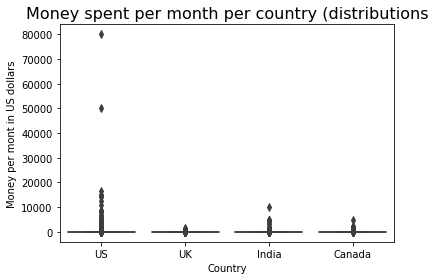

In [17]:
top4=newcoders_survey[newcoders_survey["CountryLive"].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# box plots to visualize distributions
sns.boxplot(y="MoneySpentMonth",x="CountryLive",data=top4)
plt.title("Money spent per month per country (distributions",fontsize=16)
plt.ylabel("Money per mont in US dollars")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

As per the plot we can say that effectively US has outliers and this distorsions the distribution, the other contries do not show outliers in the plot.
So now we are going to isolate the values under 20000 because we have 2 persons that spent 50000 dollars by month which is not posible. 

In [18]:
newcoders_survey=newcoders_survey[newcoders_survey["MoneySpentMonth"]<20000]

In [19]:
#recompute mean for each country
countries_mean=newcoders_survey.groupby("CountryLive").mean()
countries_mean["MoneySpentMonth"][["United States of America",
                                   "India","United Kingdom","Canada"]]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentMonth, dtype: float64

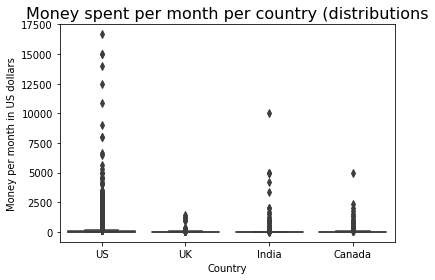

In [20]:
top4=newcoders_survey[newcoders_survey["CountryLive"].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# box plots to visualize distributions
sns.boxplot(y="MoneySpentMonth",x="CountryLive",data=top4)
plt.title("Money spent per month per country (distributions",fontsize=16)
plt.ylabel("Money per month in US dollars")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

after plot again the spend for each money we can see that for US still there are outliers near to $ 14000 and for india there are two values that seems outliers maybe they attended several bootcamps that tends to be so expensive. so take a look closet.

In [21]:
india_outliers=top4[
                    (top4["CountryLive"]=="India") &
                    (top4["MoneySpentMonth"]>=2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,...,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Aerospace and Aeronautical Engineering,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working but looking for work,NaN,80000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Electrical and Electronics Engineering,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Unable to work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,65000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Communications,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


it seems tha neither of these participants attend bootcamps, maybe they spend that money studying at university and did not undertand at all the survey, but this expenses should not be in this survey.
For the next let´s check the same for the outliers in US

In [22]:
#removing outliers in india
top4 = top4.drop(india_outliers.index)

In [23]:
us_outliers=top4[
                    (top4["CountryLive"]=="United States of America") &
                    (top4["MoneySpentMonth"]>=6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,...,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,bachelor's degree,Anthropology,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,NaN,United States of America,software development and IT,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,reactivex.io/learnrx/ & jafar husain,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Biology,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,70000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,bachelor's degree,Business Administration and Management,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,educatio

looking at the results 5/7 people attend bootcamps which could explain the high expenses in learning for the other 2 is difficult to know from data where they coould have spent that quantity of money and also some of them had programming for less three months when they completed the survey, so this can indicate that they invest in the bootcamp starting the bootcam but in the next months di not spend anything. Let's remove the outliers with the next conditions:
* participants that not attend bootcamps
* had been programming for less three months at moment to complete the survey

In [24]:
#removing participants that did not attend bootcamps
not_bootcamps=  top4[
                    (top4["CountryLive"]=="United States of America") &
                    (top4["MoneySpentMonth"]>=6000) &
                    (top4["AttendedBootcamp"]==0)]

top4=top4.drop(not_bootcamps.index)

#removing participants that had been programming for less than 3 months

less_3months=   top4[
                    (top4["CountryLive"]=="United States of America") &
                    (top4["MoneySpentMonth"]>=6000) &
                    (top4["MonthsProgramming"]<=3)]

top4=top4.drop(less_3months.index)

looking the plot again for canada there is one person that spent over 4500 dollars by mont, let's examine closer this person

In [25]:
# Examine the extreme outliers for Canada
canada_outliers = top4[
    (top4['CountryLive'] == 'Canada') & 
    (top4['MoneySpentMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,...,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


this participant is similar to US respondets we look at before, he or she had not been programming for not more that two months, probably paid at the begining to enroll in the bootcamp and after did not spend anything, so we will remove this outlier

In [26]:
top4 = top4.drop(canada_outliers.index)

In [27]:
# computing mean again for money spent each month
top4.groupby("CountryLive").mean()["MoneySpentMonth"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentMonth, dtype: float64

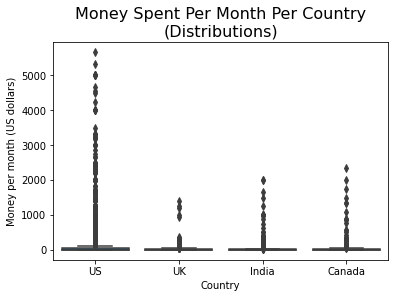

In [28]:
sns.boxplot(y = 'MoneySpentMonth', x = 'CountryLive',
            data = top4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## **Chosing the best markets**


definitively US is the main market to invest since people spend \$ 142 by month in average in courses. Our company offer suscriptions of \$ 59 per month so it fit in the spends of people who is living in US and Canada is the second market, they are willing to pay \$ 91 per month, the other 4 markets are far, but know if we see India in average spend \$ 63 which is over the suscripcion price that company offers. UK spent is under the suscripcion so it is indicate us do not advertise in it.
US, Canada and India fit in the budget of the suscription so let's take at look the potential customers for all the 4 countries:

In [29]:
#frecuency table for the 4 countries
top4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

As we can see most the people are living in US but india is almmost twice than canada but in Canada are willing to pay more that India.
at this point we can male different combinations of advertisement:

1. we can advetise in US, India and Canada as follows:
* 60% US, 25% india , 15% Canada
2. advertise only in US and India
* 70% US and 30 % India
3. advertise only in US 

## Conclusion

After present our analysis we got 4 markets to invest in as per select those countries which most of people in the survey are living and then sort countries which invest more money in learning. There were some outliers that distorted the data, after eliminated we find that US, Canada , India and UK in theses positions spent more money. However, India as per survey is where there are more potential customers that Canada. It is not good idea to invest only in one market since is good to diversify investment to avoid risks.
This let us two options but is hard to make a decision for this reason we decide to send this results to marketing team and they can use their domain knowledge to make the best decision.
